#Predicting congenital syphilis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/AM/Clinical and sociodemographic data on congenital syphilis cases, Brazil, 2013-2021/data_set.csv')

In [ ]:
df.head()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


###Hiperparâmetros

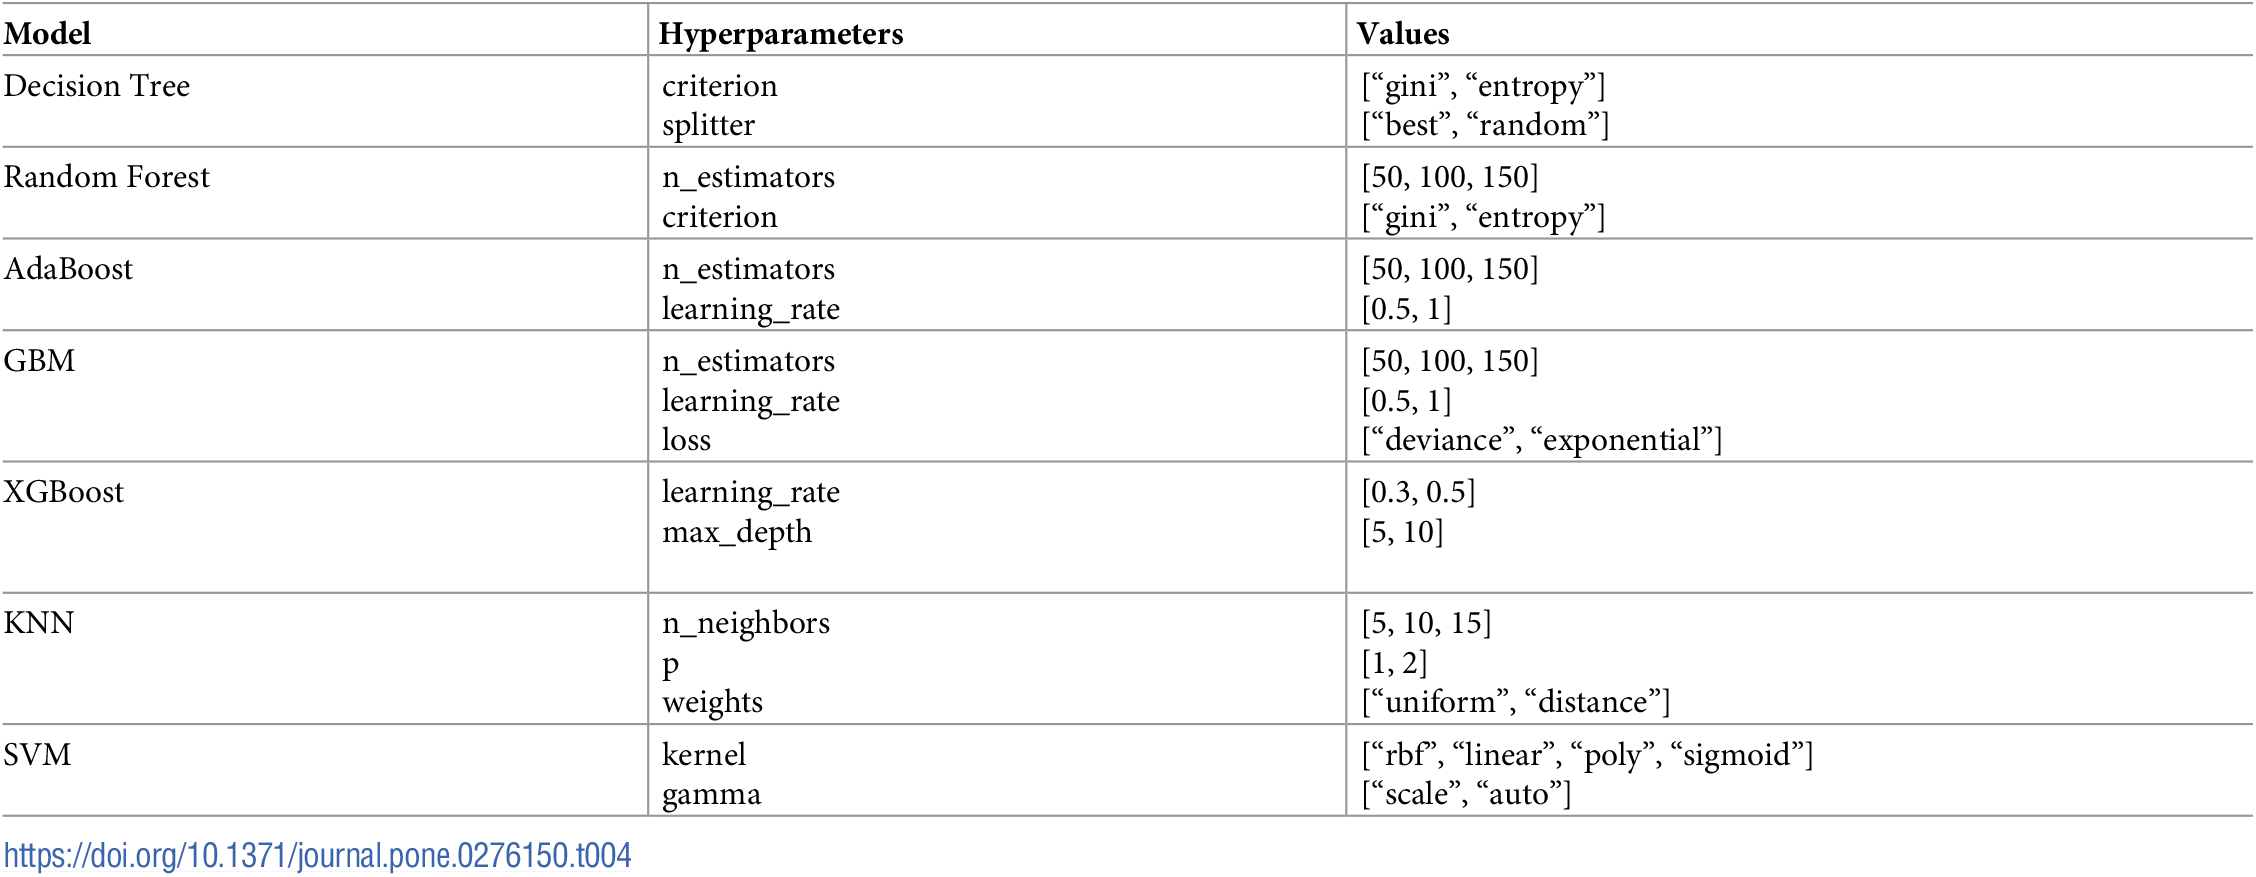

## Imbalanced Dataset (IDS)

###knn

##KNN
Melhores hiperparâmetros: {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

Acurácia: 0.9820423799832395
Precisão: 0.9820423799832395
Sensibilidade (Recall): 1.0
Especificidade: 0.0
F1-score: 0.9909398405411936


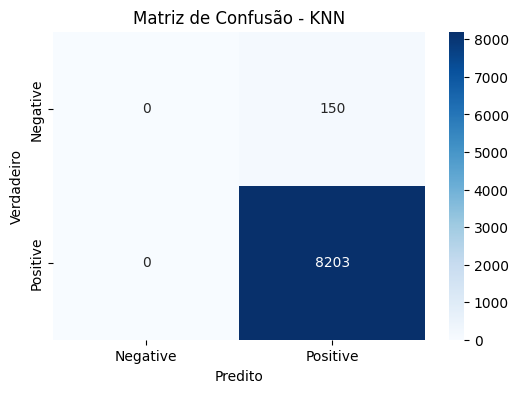

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 15],
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

X = df.drop('VDRL_RESULT', axis=1)
y = df['VDRL_RESULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

print("##KNN")
print("Melhores hiperparâmetros:", grid.best_params_)

print("\nAcurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade (Recall):", sensitivity)
print("Especificidade:", specificity)
print("F1-score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN')
plt.show()

###árvore de decisão

## Árvore de Decisão
Melhores hiperparâmetros: {'criterion': 'entropy', 'splitter': 'best'}

Acurácia: 0.9570214294265533
Precisão: 0.9824108241082411
Sensibilidade (Recall): 0.9736681701816409
Especificidade: 0.04666666666666667
F1-score: 0.9780199595910121


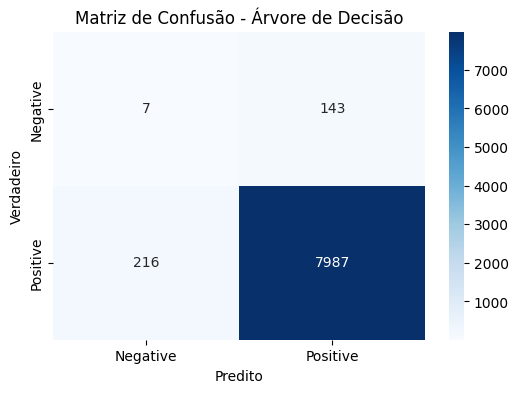

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)

grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
sensitivity_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt) if (tn_dt + fp_dt) != 0 else 0

print("## Árvore de Decisão")
print("Melhores hiperparâmetros:", grid_dt.best_params_)

print("\nAcurácia:", accuracy_dt)
print("Precisão:", precision_dt)
print("Sensibilidade (Recall):", sensitivity_dt)
print("Especificidade:", specificity_dt)
print("F1-score:", f1_dt)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

###random forest

## Random Forest
Melhores hiperparâmetros: {'criterion': 'gini', 'n_estimators': 50}

Acurácia: 0.9819226625164611
Precisão: 0.9821556886227545
Sensibilidade (Recall): 0.9997561867609411
Especificidade: 0.006666666666666667
F1-score: 0.990877786503957


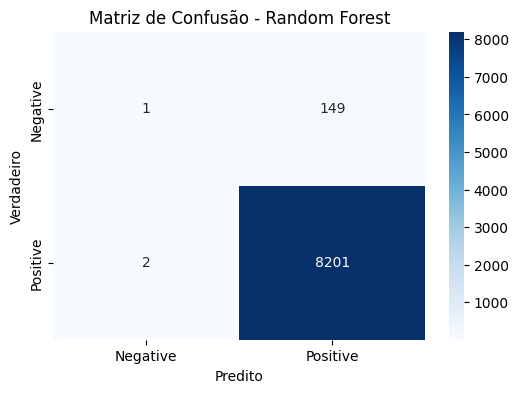

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)

grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
sensitivity_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) != 0 else 0


print("## Random Forest")
print("Melhores hiperparâmetros:", grid_rf.best_params_)

print("\nAcurácia:", accuracy_rf)
print("Precisão:", precision_rf)
print("Sensibilidade (Recall):", sensitivity_rf)
print("Especificidade:", specificity_rf)
print("F1-score:", f1_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

### adaptive boosting

##AdaBoost
Melhores parâmetros: {'learning_rate': 0.5, 'n_estimators': 50}
Melhor pontuação (accuracy): 0.9797659321593564

Métricas de avaliação no conjunto de teste:
Accuracy: 0.9820
Precision: 0.9644
Recall: 0.9820
F1-score: 0.9731


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


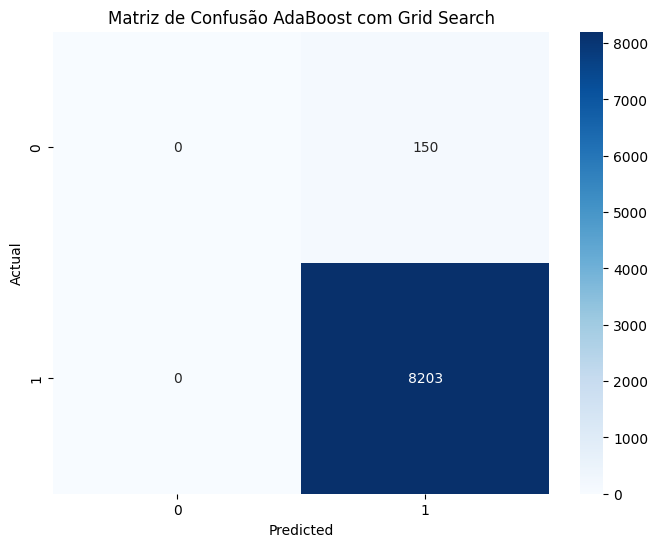

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("##AdaBoost")
print("Melhores parâmetros:", best_params)
print("Melhor pontuação (accuracy):", best_score)

best_adaboost_model = grid_search.best_estimator_
y_pred = best_adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão AdaBoost com Grid Search')
plt.show()

###gradient boosting machines

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

##Gradient Boosting
Melhores parâmetros: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}

Accuracy: 0.9820
Precision: 0.9644
Recall: 0.9820
F1 Score: 0.9731
Confusion Matrix:


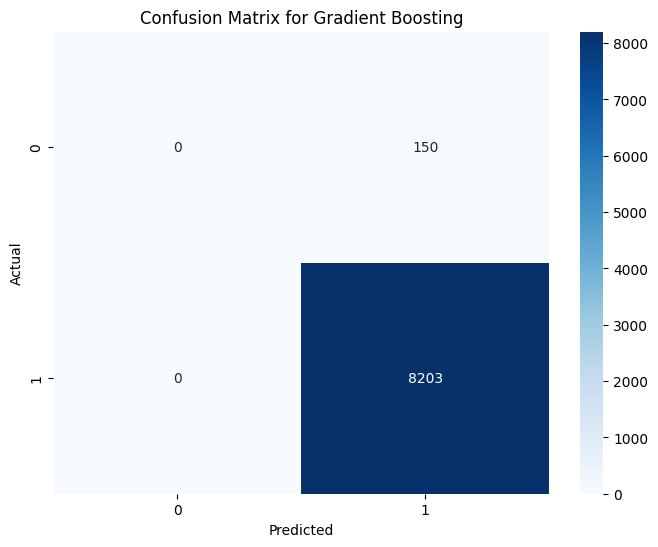

In [ ]:
param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0],
    'loss': ['deviance', 'exponential']
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy')

grid_search_gbm.fit(X_train, y_train)

best_gbm_model = grid_search_gbm.best_estimator_

y_pred_gbm = best_gbm_model.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

print("##Gradient Boosting")
print(f"Melhores parâmetros: {grid_search_gbm.best_params_}")
print(f"\nAccuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

###extreme gradient boosting

##XGB
Melhores parâmetros:
{'learning_rate': 0.3, 'max_depth': 5}

Métricas de avaliação no conjunto de teste:
Acurácia: 0.9818
Precisão: 0.9644
Recall: 0.9818
F1-Score: 0.9730

Matriz de Confusão:


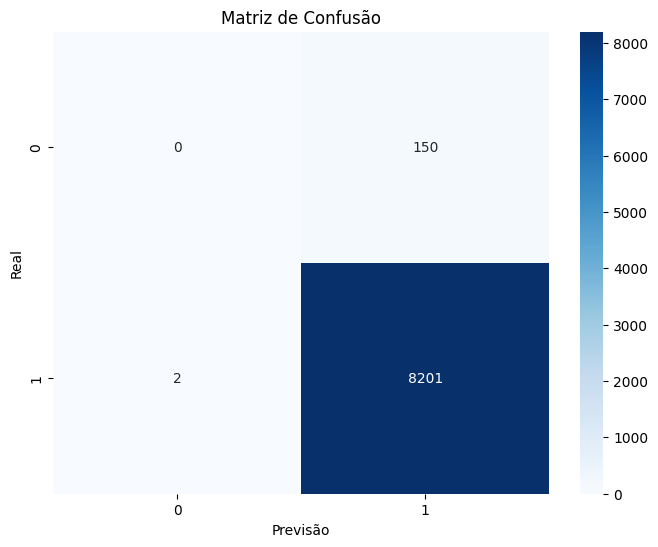

In [ ]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.3, 0.5],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("##XGB")
print("Melhores parâmetros:")
print(best_params)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

###support vector machine

In [ ]:
svm = SVC()

param_grid = {
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("##SVM")
print("Melhores Parâmetros:", grid_search.best_params_)
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

não foi possível aplicar esta técnica

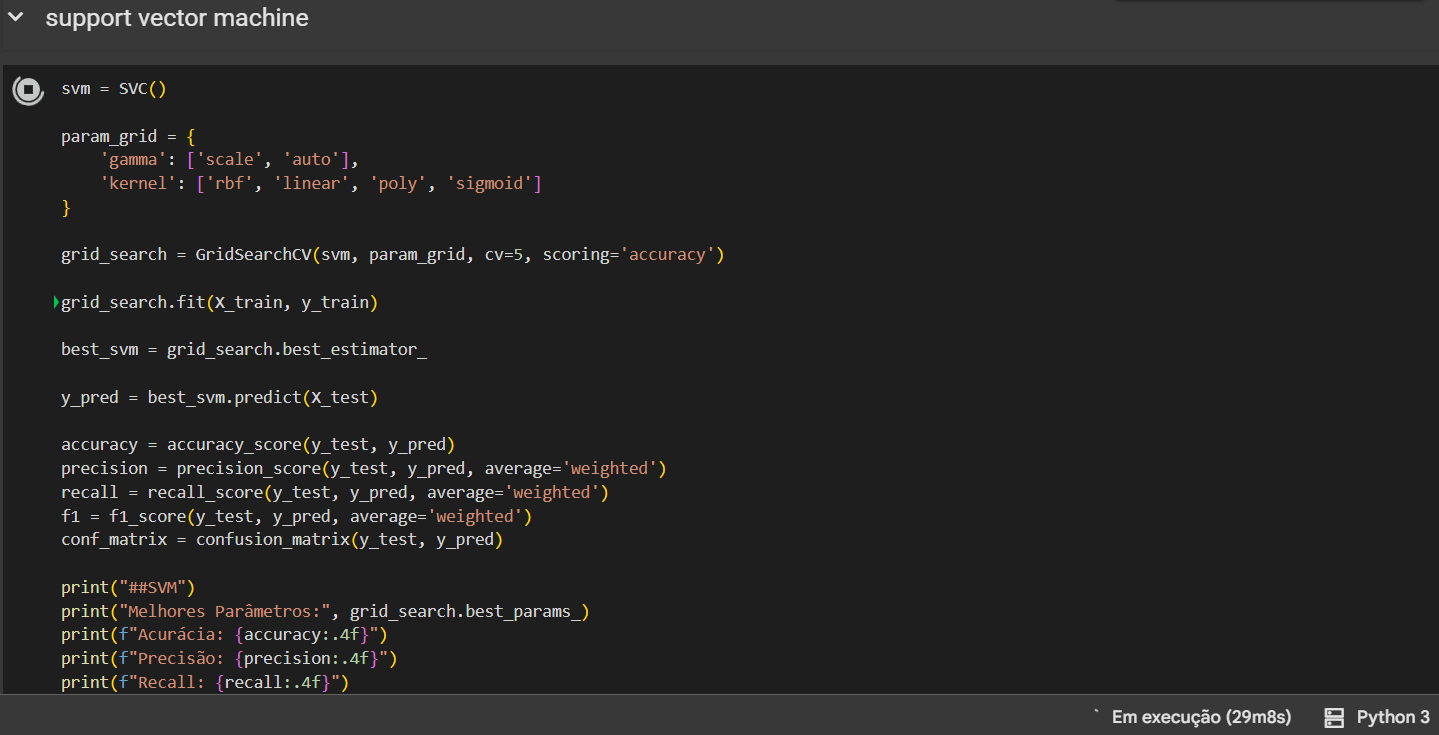

## Balanced Dataset (BDS)

In [ ]:
X = df.drop('VDRL_RESULT', axis=1)
y = df['VDRL_RESULT']

rus = RandomUnderSampler(sampling_strategy={0: 826, 1: 826}, random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['VDRL_RESULT'] = y_resampled

print("Class distribution after Random Undersampling:")
print(df_balanced['VDRL_RESULT'].value_counts())

Class distribution after Random Undersampling:
VDRL_RESULT
0.0    826
1.0    826
Name: count, dtype: int64


###knn

##KNN
Melhores hiperparâmetros: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

Acurácia: 0.5468277945619335
Precisão: 0.5061728395061729
Sensibilidade (Recall): 0.5394736842105263
Especificidade: 0.553072625698324
F1-score: 0.5222929936305732


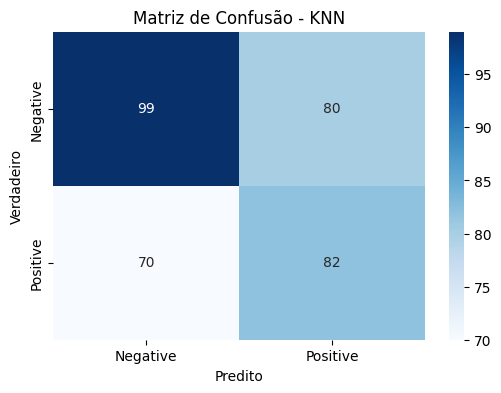

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 15],
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

X = df_balanced.drop('VDRL_RESULT', axis=1)
y = df_balanced['VDRL_RESULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

print("##KNN")
print("Melhores hiperparâmetros:", grid.best_params_)

print("\nAcurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade (Recall):", sensitivity)
print("Especificidade:", specificity)
print("F1-score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN')
plt.show()

###árvore de decisão

## Árvore de Decisão
Melhores hiperparâmetros: {'criterion': 'gini', 'splitter': 'random'}

Acurácia: 0.5045317220543807
Precisão: 0.4625
Sensibilidade (Recall): 0.4868421052631579
Especificidade: 0.5195530726256983
F1-score: 0.47435897435897434


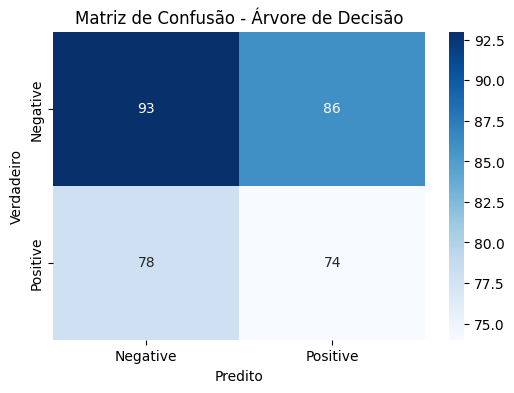

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)

grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
sensitivity_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt) if (tn_dt + fp_dt) != 0 else 0

print("## Árvore de Decisão")
print("Melhores hiperparâmetros:", grid_dt.best_params_)

print("\nAcurácia:", accuracy_dt)
print("Precisão:", precision_dt)
print("Sensibilidade (Recall):", sensitivity_dt)
print("Especificidade:", specificity_dt)
print("F1-score:", f1_dt)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

###random forest

## Random Forest
Melhores hiperparâmetros: {'criterion': 'entropy', 'n_estimators': 100}

Acurácia: 0.5861027190332326
Precisão: 0.5496688741721855
Sensibilidade (Recall): 0.5460526315789473
Especificidade: 0.6201117318435754
F1-score: 0.5478547854785478


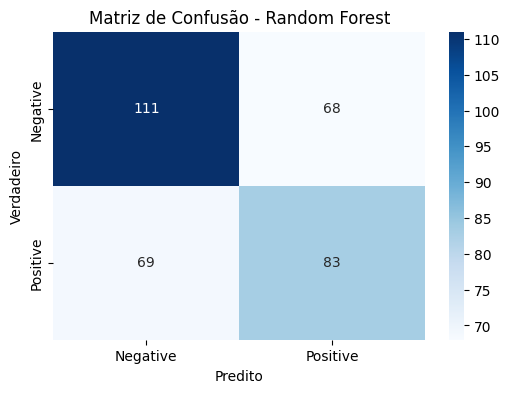

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)

grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
sensitivity_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) != 0 else 0


print("## Random Forest")
print("Melhores hiperparâmetros:", grid_rf.best_params_)

print("\nAcurácia:", accuracy_rf)
print("Precisão:", precision_rf)
print("Sensibilidade (Recall):", sensitivity_rf)
print("Especificidade:", specificity_rf)
print("F1-score:", f1_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

###adaptive boosting

##AdaBoost
Melhores parâmetros: {'learning_rate': 0.5, 'n_estimators': 100}
Melhor pontuação (accuracy): 0.593461978273299

Métricas de avaliação no conjunto de teste:
Accuracy: 0.5740
Precision: 0.5772
Recall: 0.5740
F1-score: 0.5747


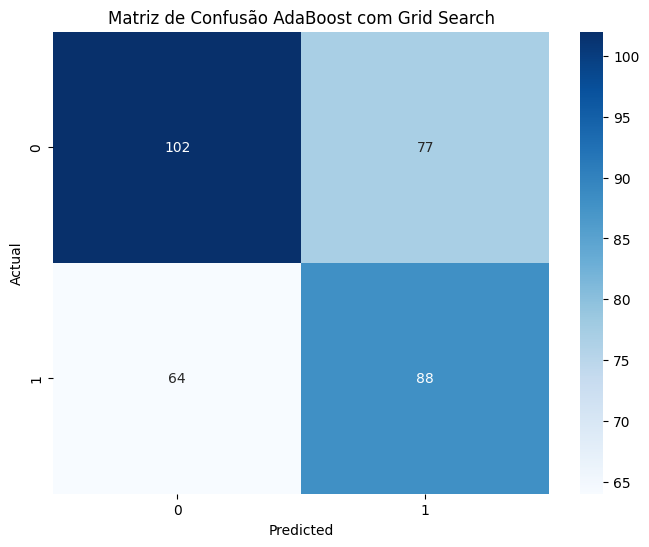

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("##AdaBoost")
print("Melhores parâmetros:", best_params)
print("Melhor pontuação (accuracy):", best_score)

best_adaboost_model = grid_search.best_estimator_
y_pred = best_adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão AdaBoost com Grid Search')
plt.show()

###gradient boosting machines

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

##Gradient Boosting
Melhores parâmetros: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}

Accuracy: 0.5680
Precision: 0.5701
Recall: 0.5680
F1 Score: 0.5686
Confusion Matrix:


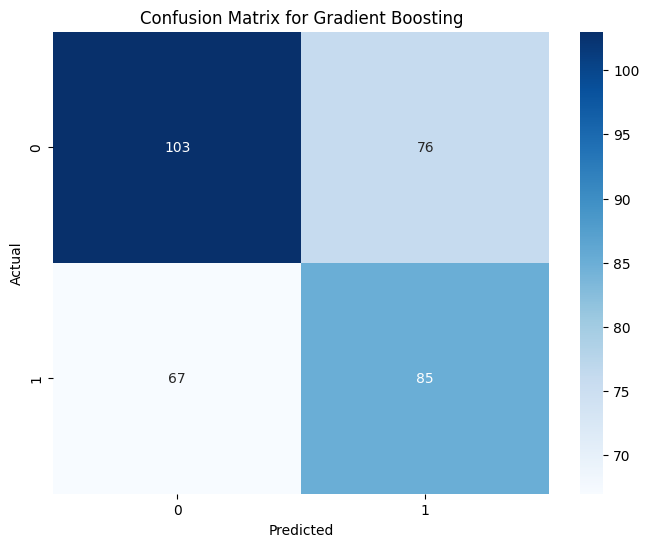

In [ ]:
param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0],
    'loss': ['deviance', 'exponential']
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy')

grid_search_gbm.fit(X_train, y_train)

best_gbm_model = grid_search_gbm.best_estimator_

y_pred_gbm = best_gbm_model.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

print("##Gradient Boosting")
print(f"Melhores parâmetros: {grid_search_gbm.best_params_}")
print(f"\nAccuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

###extreme gradient boosting

##XGB
Melhores parâmetros:
{'learning_rate': 0.3, 'max_depth': 5}

Métricas de avaliação no conjunto de teste:
Acurácia: 0.5680
Precisão: 0.5706
Recall: 0.5680
F1-Score: 0.5687

Matriz de Confusão:


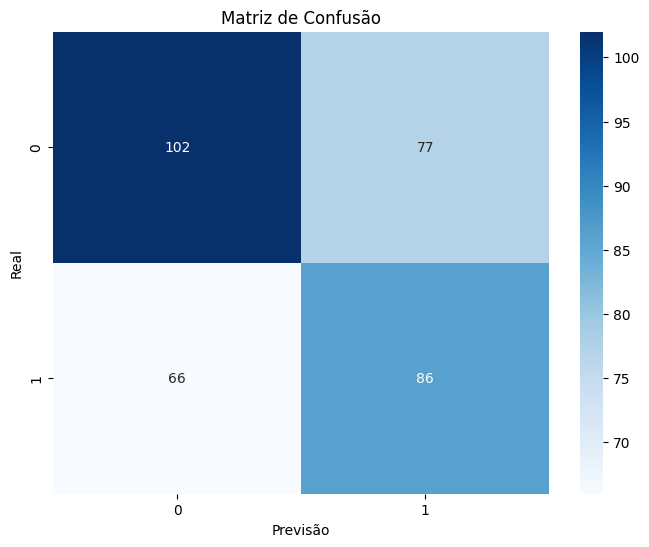

In [ ]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.3, 0.5],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("##XGB")
print("Melhores parâmetros:")
print(best_params)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

##Imbalanced with One-hot Encoding Data Set (IODS)

In [ ]:
df_iods = pd.get_dummies(df, drop_first=True)

print("Shape of the one-hot encoded dataframe:", df_iods.shape)

X_iods = df_iods.drop('VDRL_RESULT', axis=1)
y_iods = df_iods['VDRL_RESULT']

X_train, X_test, y_train, y_test = train_test_split(X_iods, y_iods, test_size=0.2, random_state=42)

print("\nShape of X_train_iods:", X_train.shape)
print("Shape of X_test_iods:", X_test.shape)
print("Shape of y_train_iods:", y_train.shape)
print("Shape of y_test_iods:", y_test.shape)

Shape of the one-hot encoded dataframe: (41762, 26)

Shape of X_train_iods: (33409, 25)
Shape of X_test_iods: (8353, 25)
Shape of y_train_iods: (33409,)
Shape of y_test_iods: (8353,)


###knn

##KNN
Melhores hiperparâmetros: {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

Acurácia: 0.9820423799832395
Precisão: 0.9820423799832395
Sensibilidade (Recall): 1.0
Especificidade: 0.0
F1-score: 0.9909398405411936


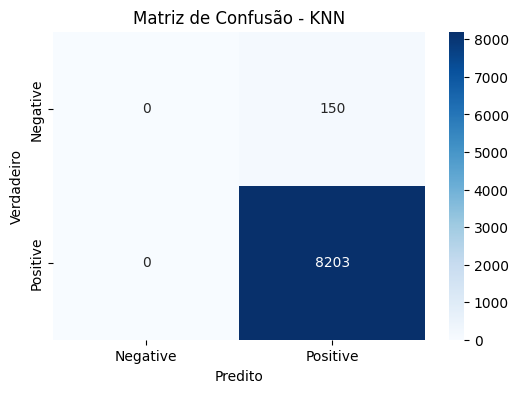

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 15],
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

print("##KNN")
print("Melhores hiperparâmetros:", grid.best_params_)

print("\nAcurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade (Recall):", sensitivity)
print("Especificidade:", specificity)
print("F1-score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN')
plt.show()

###árvore de decisão

## Árvore de Decisão
Melhores hiperparâmetros: {'criterion': 'entropy', 'splitter': 'best'}

Acurácia: 0.9570214294265533
Precisão: 0.9824108241082411
Sensibilidade (Recall): 0.9736681701816409
Especificidade: 0.04666666666666667
F1-score: 0.9780199595910121


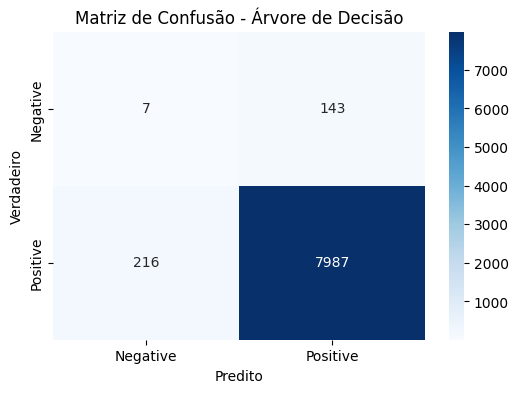

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)

grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
sensitivity_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt) if (tn_dt + fp_dt) != 0 else 0

print("## Árvore de Decisão")
print("Melhores hiperparâmetros:", grid_dt.best_params_)

print("\nAcurácia:", accuracy_dt)
print("Precisão:", precision_dt)
print("Sensibilidade (Recall):", sensitivity_dt)
print("Especificidade:", specificity_dt)
print("F1-score:", f1_dt)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

###random forest

## Random Forest
Melhores hiperparâmetros: {'criterion': 'gini', 'n_estimators': 50}

Acurácia: 0.9819226625164611
Precisão: 0.9821556886227545
Sensibilidade (Recall): 0.9997561867609411
Especificidade: 0.006666666666666667
F1-score: 0.990877786503957


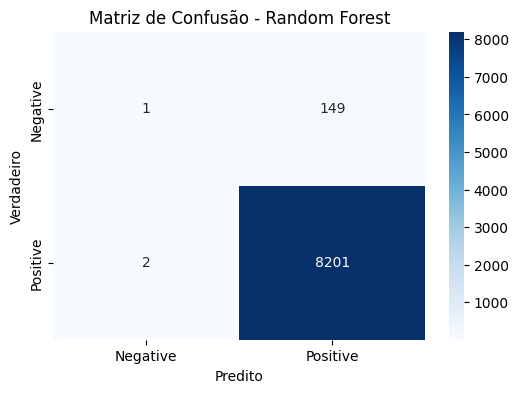

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)

grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
sensitivity_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) != 0 else 0


print("## Random Forest")
print("Melhores hiperparâmetros:", grid_rf.best_params_)

print("\nAcurácia:", accuracy_rf)
print("Precisão:", precision_rf)
print("Sensibilidade (Recall):", sensitivity_rf)
print("Especificidade:", specificity_rf)
print("F1-score:", f1_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

###adaptive boosting

##AdaBoost
Melhores parâmetros: {'learning_rate': 0.5, 'n_estimators': 50}
Melhor pontuação (accuracy): 0.9797659321593564

Métricas de avaliação no conjunto de teste:
Accuracy: 0.9820
Precision: 0.9644
Recall: 0.9820
F1-score: 0.9731


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


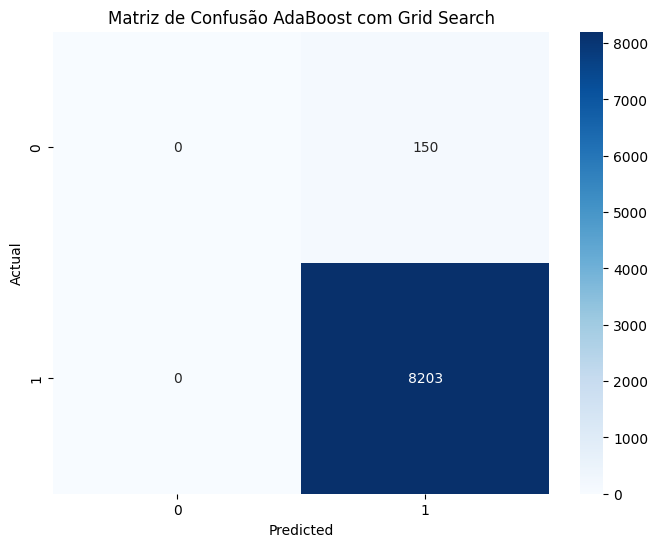

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("##AdaBoost")
print("Melhores parâmetros:", best_params)
print("Melhor pontuação (accuracy):", best_score)

best_adaboost_model = grid_search.best_estimator_
y_pred = best_adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão AdaBoost com Grid Search')
plt.show()

###gradient boosting machines

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

##Gradient Boosting
Melhores parâmetros: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}

Accuracy: 0.9820
Precision: 0.9644
Recall: 0.9820
F1 Score: 0.9731
Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


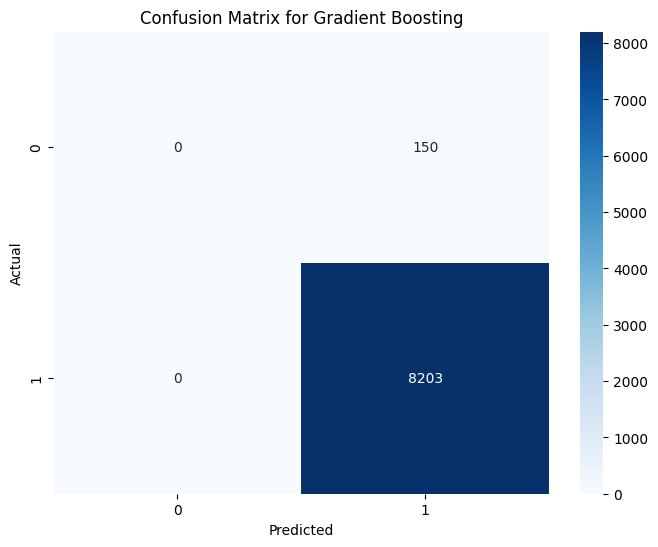

In [ ]:
param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0],
    'loss': ['deviance', 'exponential']
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy')

grid_search_gbm.fit(X_train, y_train)

best_gbm_model = grid_search_gbm.best_estimator_

y_pred_gbm = best_gbm_model.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

print("##Gradient Boosting")
print(f"Melhores parâmetros: {grid_search_gbm.best_params_}")
print(f"\nAccuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

###extreme gradient boosting

##XGB
Melhores parâmetros:
{'learning_rate': 0.3, 'max_depth': 5}

Métricas de avaliação no conjunto de teste:
Acurácia: 0.9818
Precisão: 0.9644
Recall: 0.9818
F1-Score: 0.9730

Matriz de Confusão:


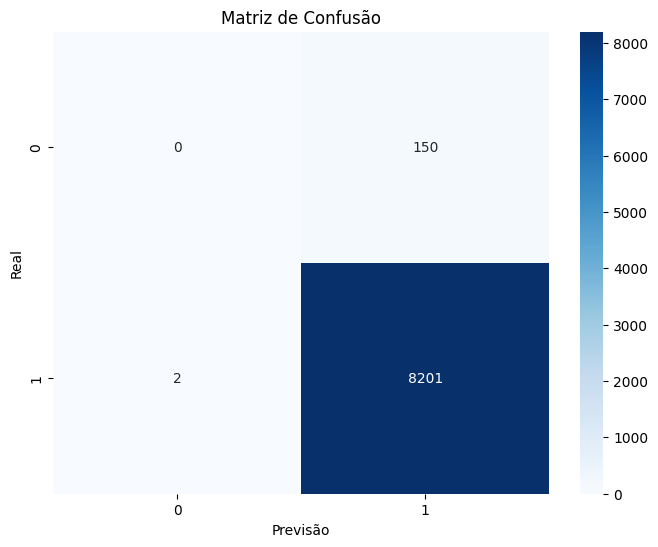

In [ ]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.3, 0.5],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("##XGB")
print("Melhores parâmetros:")
print(best_params)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

##Balanced with One-hot Encoding Data Set (BODS)

In [ ]:
df_bods = pd.get_dummies(df_balanced, drop_first=True)

print("Shape of the one-hot encoded balanced dataframe:", df_bods.shape)

X_bods = df_bods.drop('VDRL_RESULT', axis=1)
y_bods = df_bods['VDRL_RESULT']

X_train, X_test, y_train, y_test = train_test_split(X_bods, y_bods, test_size=0.2, random_state=42)

print("\nShape of X_train_bods:", X_train.shape)
print("Shape of X_test_bods:", X_test.shape)
print("Shape of y_train_bods:", y_train.shape)
print("Shape of y_test_bods:", y_test.shape)

Shape of the one-hot encoded balanced dataframe: (1652, 26)

Shape of X_train_bods: (1321, 25)
Shape of X_test_bods: (331, 25)
Shape of y_train_bods: (1321,)
Shape of y_test_bods: (331,)


###knn

##KNN
Melhores hiperparâmetros: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

Acurácia: 0.5468277945619335
Precisão: 0.5061728395061729
Sensibilidade (Recall): 0.5394736842105263
Especificidade: 0.553072625698324
F1-score: 0.5222929936305732


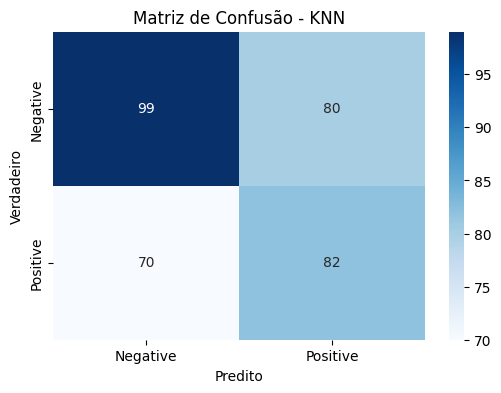

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 15],
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

print("##KNN")
print("Melhores hiperparâmetros:", grid.best_params_)

print("\nAcurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade (Recall):", sensitivity)
print("Especificidade:", specificity)
print("F1-score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN')
plt.show()

###árvore de decisão

## Árvore de Decisão
Melhores hiperparâmetros: {'criterion': 'gini', 'splitter': 'random'}

Acurácia: 0.5045317220543807
Precisão: 0.4625
Sensibilidade (Recall): 0.4868421052631579
Especificidade: 0.5195530726256983
F1-score: 0.47435897435897434


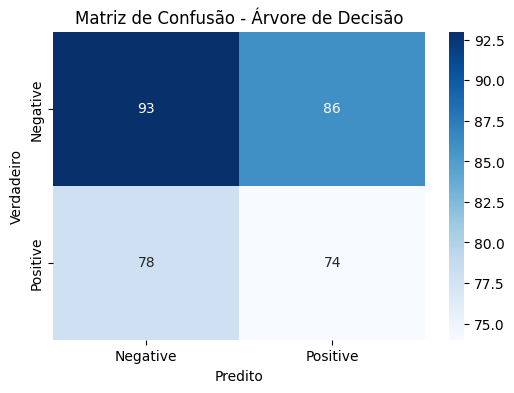

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)

grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
sensitivity_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt) if (tn_dt + fp_dt) != 0 else 0

print("## Árvore de Decisão")
print("Melhores hiperparâmetros:", grid_dt.best_params_)

print("\nAcurácia:", accuracy_dt)
print("Precisão:", precision_dt)
print("Sensibilidade (Recall):", sensitivity_dt)
print("Especificidade:", specificity_dt)
print("F1-score:", f1_dt)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

###random forest

## Random Forest
Melhores hiperparâmetros: {'criterion': 'entropy', 'n_estimators': 100}

Acurácia: 0.5861027190332326
Precisão: 0.5496688741721855
Sensibilidade (Recall): 0.5460526315789473
Especificidade: 0.6201117318435754
F1-score: 0.5478547854785478


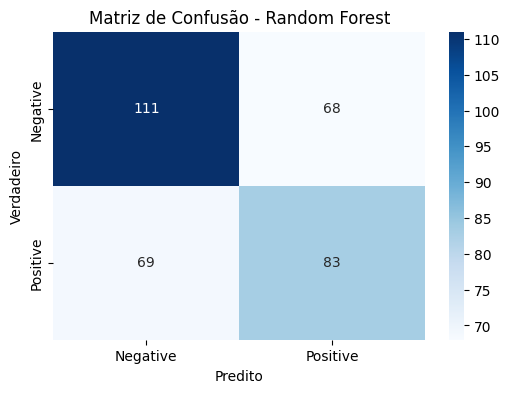

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)

grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
sensitivity_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) != 0 else 0


print("## Random Forest")
print("Melhores hiperparâmetros:", grid_rf.best_params_)

print("\nAcurácia:", accuracy_rf)
print("Precisão:", precision_rf)
print("Sensibilidade (Recall):", sensitivity_rf)
print("Especificidade:", specificity_rf)
print("F1-score:", f1_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

###adaptive boosting

##AdaBoost
Melhores parâmetros: {'learning_rate': 0.5, 'n_estimators': 100}
Melhor pontuação (accuracy): 0.593461978273299

Métricas de avaliação no conjunto de teste:
Accuracy: 0.5740
Precision: 0.5772
Recall: 0.5740
F1-score: 0.5747


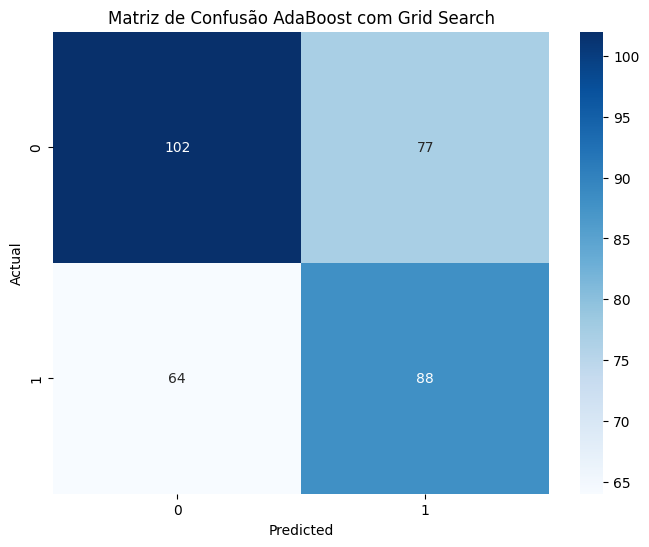

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("##AdaBoost")
print("Melhores parâmetros:", best_params)
print("Melhor pontuação (accuracy):", best_score)

best_adaboost_model = grid_search.best_estimator_
y_pred = best_adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão AdaBoost com Grid Search')
plt.show()

###gradient boosting

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

##Gradient Boosting
Melhores parâmetros: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}

Accuracy: 0.5680
Precision: 0.5701
Recall: 0.5680
F1 Score: 0.5686
Confusion Matrix:


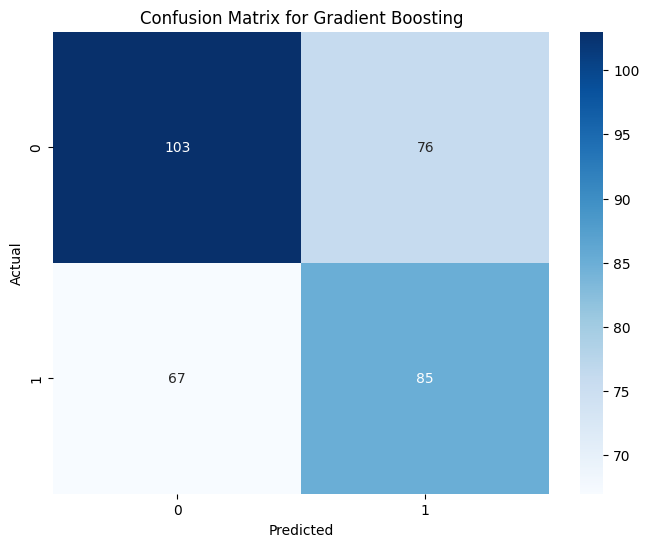

In [ ]:
param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0],
    'loss': ['deviance', 'exponential']
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy')

grid_search_gbm.fit(X_train, y_train)

best_gbm_model = grid_search_gbm.best_estimator_

y_pred_gbm = best_gbm_model.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

print("##Gradient Boosting")
print(f"Melhores parâmetros: {grid_search_gbm.best_params_}")
print(f"\nAccuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

###extreme gradient boosting

##XGB
Melhores parâmetros:
{'learning_rate': 0.3, 'max_depth': 5}

Métricas de avaliação no conjunto de teste:
Acurácia: 0.5680
Precisão: 0.5706
Recall: 0.5680
F1-Score: 0.5687

Matriz de Confusão:


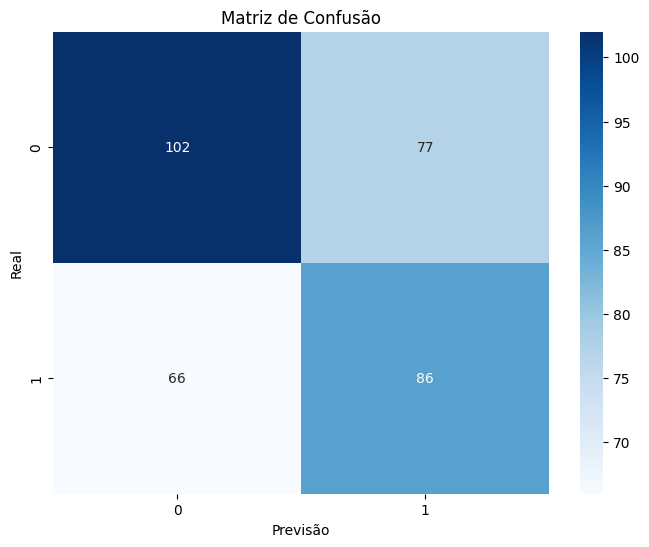

In [ ]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.3, 0.5],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("##XGB")
print("Melhores parâmetros:")
print(best_params)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

##Imbalanced with One-hot Encoding with Column Drop Data Set (IODDS)

In [ ]:
columns_to_filter_2 = ['CONS_ALCOHOL', 'RH FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'FOOD_INSECURITY', 'FAM_PLANNING', 'CONN_SEWER_NET', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'BLOOD_GROUP', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES']
columns_to_filter_4 = ['WATER_TREATMENT', 'MARITAL_STATUS', 'TYPE_HOUSE']
columns_to_filter_5 = ['NUM_RES_HOUSEHOLD']
columns_to_filter_3 = ['FAM_INCOME', 'HOUSING_STATUS']
columns_to_filter_8 = ['LEVEL_SCHOOLING']

all_columns_to_filter = list(set(columns_to_filter_2 + columns_to_filter_4 + columns_to_filter_5 + columns_to_filter_3 + columns_to_filter_8))

df_filtered = df.copy()

for col in columns_to_filter_2:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 2]

for col in columns_to_filter_4:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 4]

for col in columns_to_filter_5:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 5]

for col in columns_to_filter_3:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 3]

for col in columns_to_filter_8:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 8]


print("Shape of the dataframe after removing 'Não Informado' rows:", df_filtered.shape)

Shape of the dataframe after removing 'Não Informado' rows: (230, 26)


In [ ]:
X_filtered = df_filtered.drop('VDRL_RESULT', axis=1)
y_filtered = df_filtered['VDRL_RESULT']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

###knn

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


##KNN
Melhores hiperparâmetros: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

Acurácia: 0.9565217391304348
Precisão: 0.9565217391304348
Sensibilidade (Recall): 1.0
Especificidade: 0.0
F1-score: 0.9777777777777777


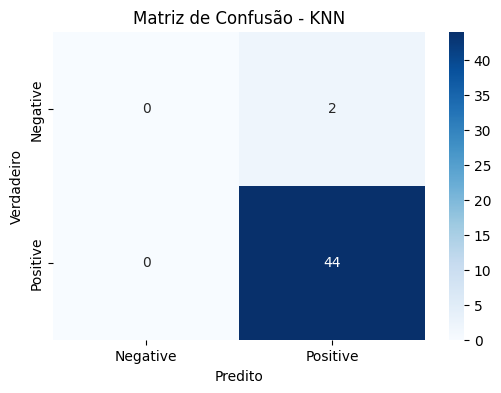

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 15],
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

print("##KNN")
print("Melhores hiperparâmetros:", grid.best_params_)

print("\nAcurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade (Recall):", sensitivity)
print("Especificidade:", specificity)
print("F1-score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN')
plt.show()

###árvore de decisão

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


## Árvore de Decisão
Melhores hiperparâmetros: {'criterion': 'entropy', 'splitter': 'best'}

Acurácia: 0.9565217391304348
Precisão: 0.9772727272727273
Sensibilidade (Recall): 0.9772727272727273
Especificidade: 0.5
F1-score: 0.9772727272727273


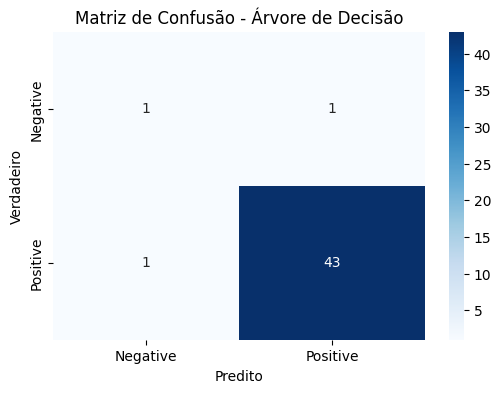

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)

grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
sensitivity_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt) if (tn_dt + fp_dt) != 0 else 0

print("## Árvore de Decisão")
print("Melhores hiperparâmetros:", grid_dt.best_params_)

print("\nAcurácia:", accuracy_dt)
print("Precisão:", precision_dt)
print("Sensibilidade (Recall):", sensitivity_dt)
print("Especificidade:", specificity_dt)
print("F1-score:", f1_dt)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

###random forest

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


## Random Forest
Melhores hiperparâmetros: {'criterion': 'gini', 'n_estimators': 50}

Acurácia: 0.9782608695652174
Precisão: 0.9777777777777777
Sensibilidade (Recall): 1.0
Especificidade: 0.5
F1-score: 0.9887640449438202


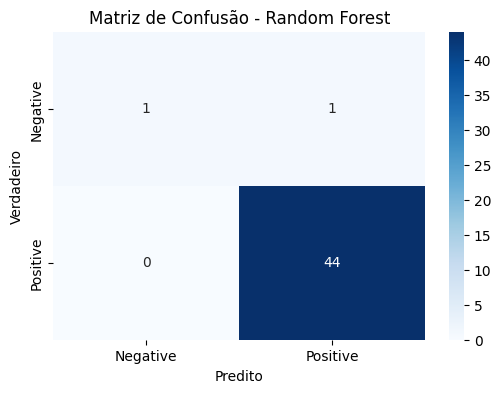

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)

grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
sensitivity_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) != 0 else 0


print("## Random Forest")
print("Melhores hiperparâmetros:", grid_rf.best_params_)

print("\nAcurácia:", accuracy_rf)
print("Precisão:", precision_rf)
print("Sensibilidade (Recall):", sensitivity_rf)
print("Especificidade:", specificity_rf)
print("F1-score:", f1_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

###adaptive boosting

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


##AdaBoost
Melhores parâmetros: {'learning_rate': 0.5, 'n_estimators': 50}
Melhor pontuação (accuracy): 0.9837837837837838

Métricas de avaliação no conjunto de teste:
Accuracy: 0.9565
Precision: 0.9565
Recall: 0.9565
F1-score: 0.9565


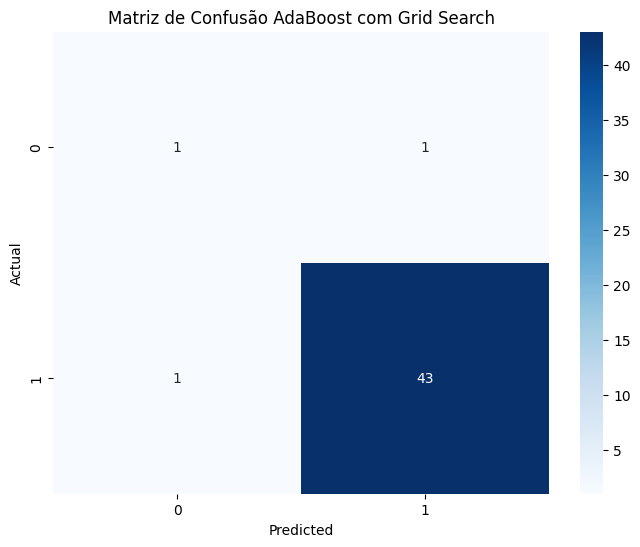

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("##AdaBoost")
print("Melhores parâmetros:", best_params)
print("Melhor pontuação (accuracy):", best_score)

best_adaboost_model = grid_search.best_estimator_
y_pred = best_adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão AdaBoost com Grid Search')
plt.show()

###gradient boosting

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  Fi

##Gradient Boosting
Melhores parâmetros: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}

Accuracy: 0.9783
Precision: 0.9787
Recall: 0.9783
F1 Score: 0.9748
Confusion Matrix:


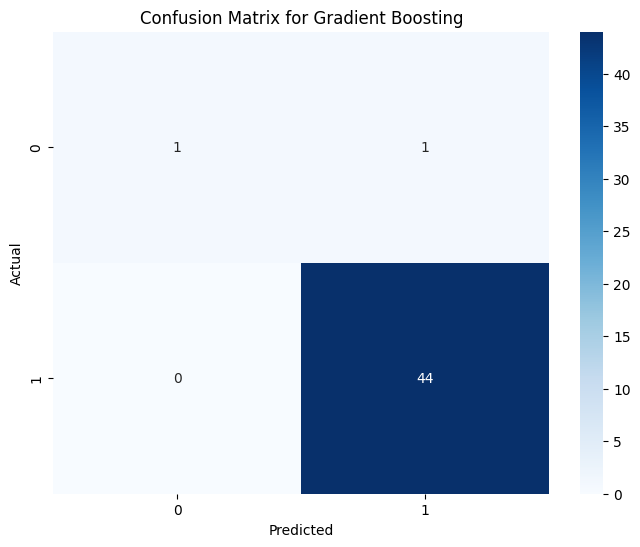

In [ ]:
param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0],
    'loss': ['deviance', 'exponential']
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy')

grid_search_gbm.fit(X_train, y_train)

best_gbm_model = grid_search_gbm.best_estimator_

y_pred_gbm = best_gbm_model.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

print("##Gradient Boosting")
print(f"Melhores parâmetros: {grid_search_gbm.best_params_}")
print(f"\nAccuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

###extreme gradient boosting

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


##XGB
Melhores parâmetros:
{'learning_rate': 0.3, 'max_depth': 5}

Métricas de avaliação no conjunto de teste:
Acurácia: 0.9565
Precisão: 0.9149
Recall: 0.9565
F1-Score: 0.9353

Matriz de Confusão:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


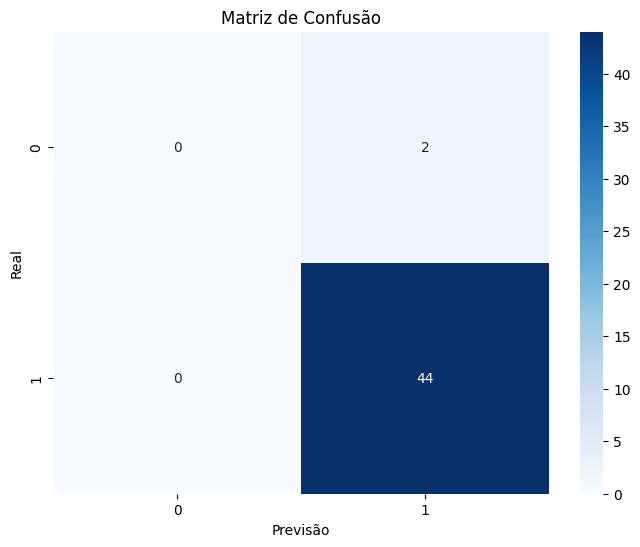

In [ ]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.3, 0.5],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("##XGB")
print("Melhores parâmetros:")
print(best_params)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

##Balanced with One-hot Encoding with Column Drop Data Set (BODDS)

In [ ]:
columns_to_filter_2 = ['CONS_ALCOHOL', 'RH FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'FOOD_INSECURITY', 'FAM_PLANNING', 'CONN_SEWER_NET', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'BLOOD_GROUP', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES']
columns_to_filter_4 = ['WATER_TREATMENT', 'MARITAL_STATUS', 'TYPE_HOUSE']
columns_to_filter_5 = ['NUM_RES_HOUSEHOLD']
columns_to_filter_3 = ['FAM_INCOME', 'HOUSING_STATUS']
columns_to_filter_8 = ['LEVEL_SCHOOLING']

all_columns_to_filter = list(set(columns_to_filter_2 + columns_to_filter_4 + columns_to_filter_5 + columns_to_filter_3 + columns_to_filter_8))

df_filtered_b = df_balanced.copy()

for col in columns_to_filter_2:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 2]

for col in columns_to_filter_4:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 4]

for col in columns_to_filter_5:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 5]

for col in columns_to_filter_3:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 3]

for col in columns_to_filter_8:
    if col in df_filtered.columns:
        df_filtered = df_filtered[df_filtered[col] != 8]


print("Shape of the dataframe after removing 'Não Informado' rows:", df_filtered.shape)

Shape of the dataframe after removing 'Não Informado' rows: (230, 26)


In [ ]:
X_filtered = df_filtered_b.drop('VDRL_RESULT', axis=1)
y_filtered = df_filtered_b['VDRL_RESULT']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

###knn

##KNN
Melhores hiperparâmetros: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

Acurácia: 0.5468277945619335
Precisão: 0.5061728395061729
Sensibilidade (Recall): 0.5394736842105263
Especificidade: 0.553072625698324
F1-score: 0.5222929936305732


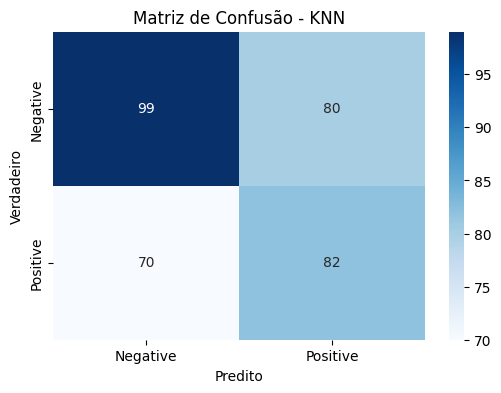

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 15],
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

print("##KNN")
print("Melhores hiperparâmetros:", grid.best_params_)

print("\nAcurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade (Recall):", sensitivity)
print("Especificidade:", specificity)
print("F1-score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN')
plt.show()

###árvore de decisão

## Árvore de Decisão
Melhores hiperparâmetros: {'criterion': 'gini', 'splitter': 'random'}

Acurácia: 0.5045317220543807
Precisão: 0.4625
Sensibilidade (Recall): 0.4868421052631579
Especificidade: 0.5195530726256983
F1-score: 0.47435897435897434


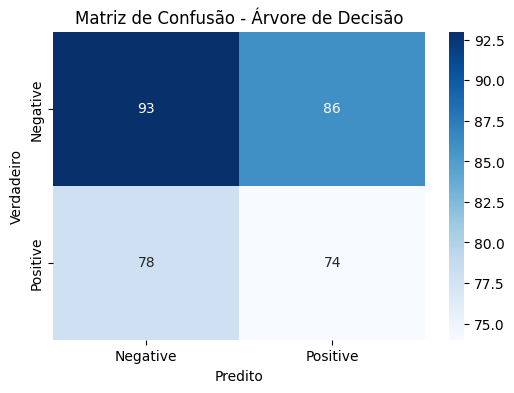

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)

grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
sensitivity_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt) if (tn_dt + fp_dt) != 0 else 0

print("## Árvore de Decisão")
print("Melhores hiperparâmetros:", grid_dt.best_params_)

print("\nAcurácia:", accuracy_dt)
print("Precisão:", precision_dt)
print("Sensibilidade (Recall):", sensitivity_dt)
print("Especificidade:", specificity_dt)
print("F1-score:", f1_dt)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

###random forest

## Random Forest
Melhores hiperparâmetros: {'criterion': 'entropy', 'n_estimators': 100}

Acurácia: 0.5861027190332326
Precisão: 0.5496688741721855
Sensibilidade (Recall): 0.5460526315789473
Especificidade: 0.6201117318435754
F1-score: 0.5478547854785478


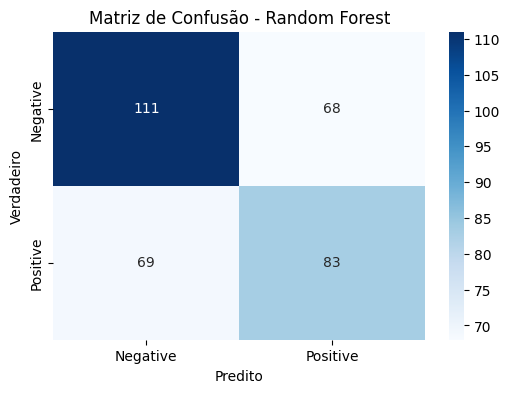

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)

grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
sensitivity_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) != 0 else 0


print("## Random Forest")
print("Melhores hiperparâmetros:", grid_rf.best_params_)

print("\nAcurácia:", accuracy_rf)
print("Precisão:", precision_rf)
print("Sensibilidade (Recall):", sensitivity_rf)
print("Especificidade:", specificity_rf)
print("F1-score:", f1_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

###adaptive boosting

##AdaBoost
Melhores parâmetros: {'learning_rate': 0.5, 'n_estimators': 100}
Melhor pontuação (accuracy): 0.593461978273299

Métricas de avaliação no conjunto de teste:
Accuracy: 0.5740
Precision: 0.5772
Recall: 0.5740
F1-score: 0.5747


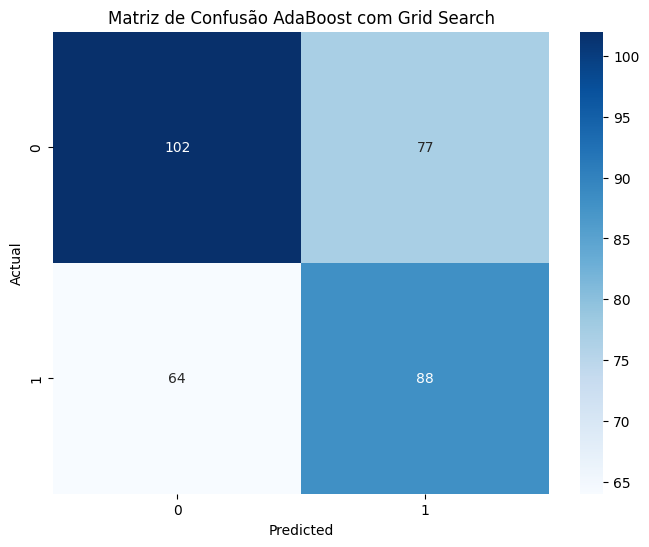

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("##AdaBoost")
print("Melhores parâmetros:", best_params)
print("Melhor pontuação (accuracy):", best_score)

best_adaboost_model = grid_search.best_estimator_
y_pred = best_adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão AdaBoost com Grid Search')
plt.show()

###gradient boosting

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

##Gradient Boosting
Melhores parâmetros: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}

Accuracy: 0.5680
Precision: 0.5701
Recall: 0.5680
F1 Score: 0.5686
Confusion Matrix:


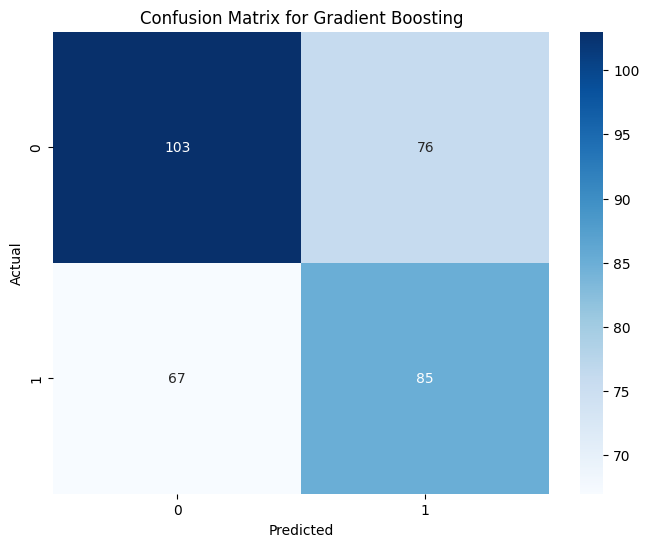

In [ ]:
param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0],
    'loss': ['deviance', 'exponential']
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy')

grid_search_gbm.fit(X_train, y_train)

best_gbm_model = grid_search_gbm.best_estimator_

y_pred_gbm = best_gbm_model.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

print("##Gradient Boosting")
print(f"Melhores parâmetros: {grid_search_gbm.best_params_}")
print(f"\nAccuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

###extreme gradient boosting

##XGB
Melhores parâmetros:
{'learning_rate': 0.3, 'max_depth': 5}

Métricas de avaliação no conjunto de teste:
Acurácia: 0.5680
Precisão: 0.5706
Recall: 0.5680
F1-Score: 0.5687

Matriz de Confusão:


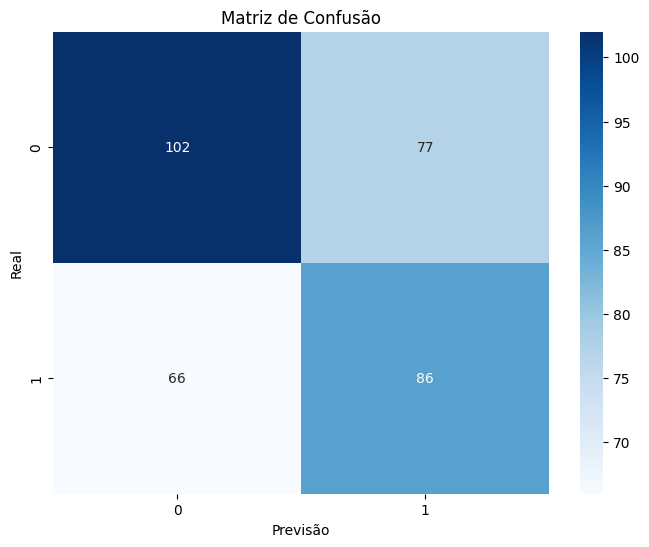

In [ ]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.3, 0.5],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("##XGB")
print("Melhores parâmetros:")
print(best_params)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMétricas de avaliação no conjunto de teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusão:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

##resultados originais

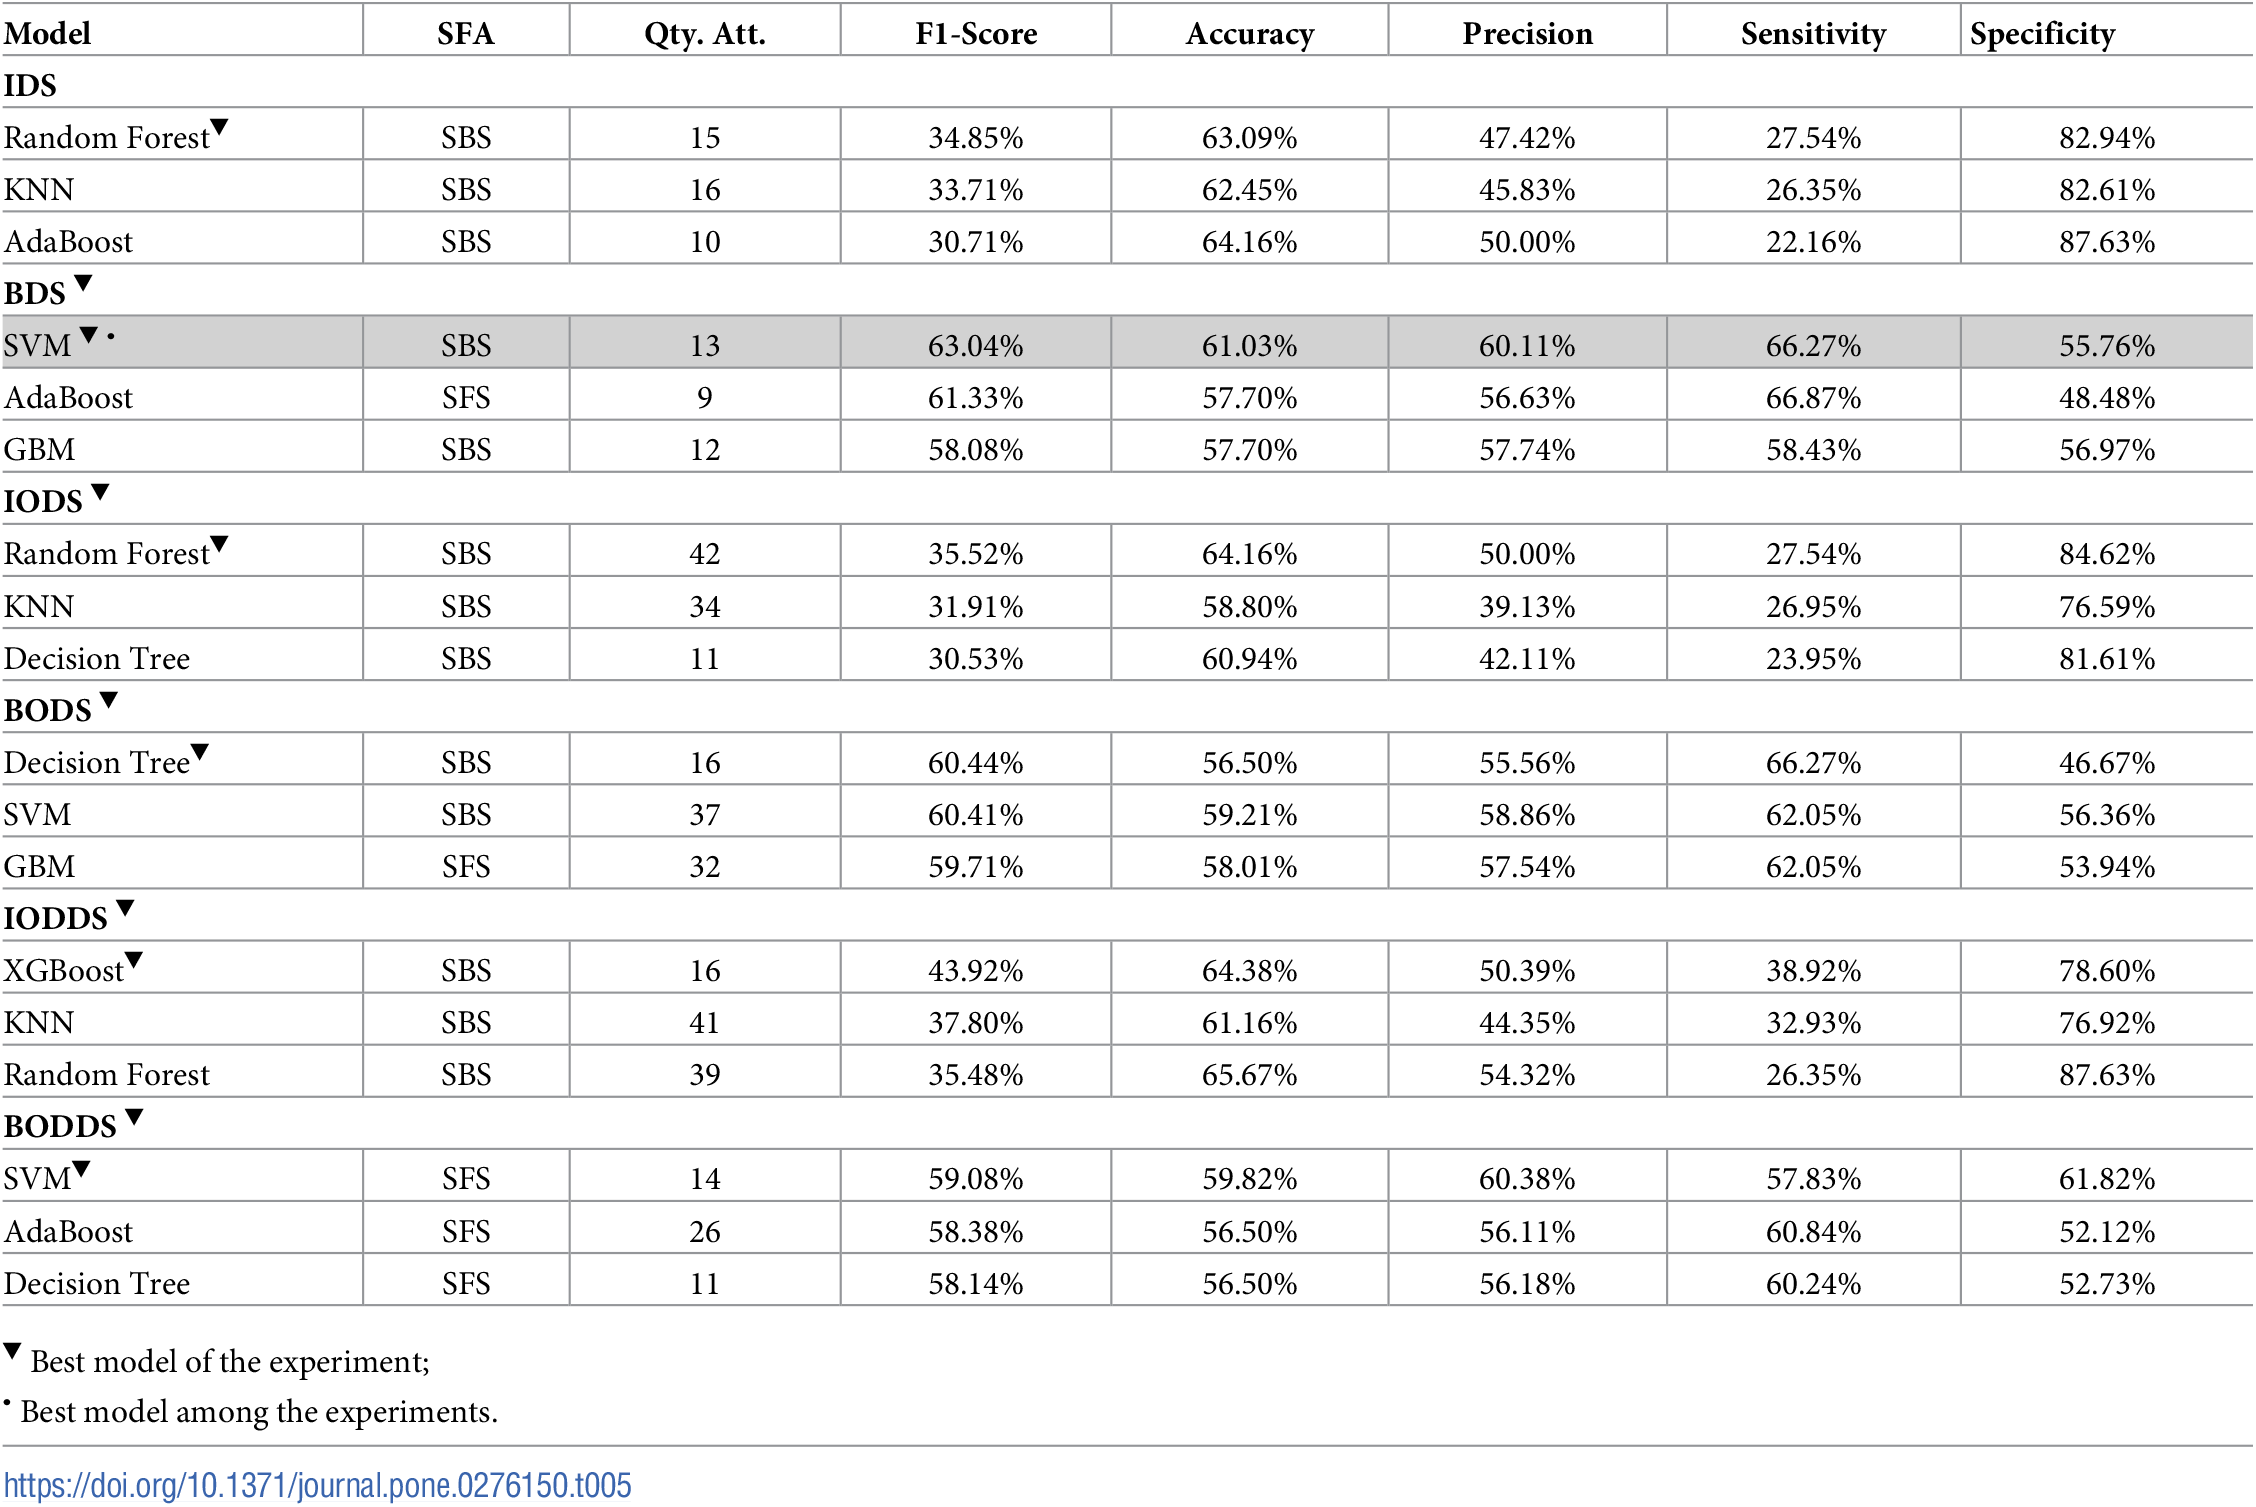